# Model Training

## 1.1 Import Data and Required Packages

In this section, we will import the necessary libraries and packages required for our data analysis and modeling process. 

### Basic Imports

First, we need to import the fundamental libraries for data manipulation, visualization, and modeling:


In [5]:
# Importing regression models and metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score  # type: ignore # For evaluating model performance
from sklearn.neighbors import KNeighborsRegressor  # type: ignore # K-Nearest Neighbors Regressor
from sklearn.tree import DecisionTreeRegressor  # type: ignore # Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor  # type: ignore # Ensemble methods
from sklearn.svm import SVR  # type: ignore # Support Vector Regressor
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from xgboost import XGBClassifier # type: ignore
from catboost import CatBoostClassifier # type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # type: ignore
import numpy as np # type: ignore
import pandas as pd  # type: ignore

## Importing the CSV Data as a Pandas DataFrame
In this section, we will import our dataset from a CSV file into a Pandas DataFrame. This allows us to manipulate and analyze the data easily.


In [6]:
df = pd.read_csv('data\heart.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_7532\2053859309.py:1: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv('data\heart.csv')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Analysis of Categorical Variables in the DataFrame

The following code prints the unique categories present in various categorical variables of the DataFrame `df`. Each variable represents a different aspect of the dataset related to heart health.

In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Sex'].unique())

print("Categories in 'ChestPainType' variable:  ",end=" ")
print(df['ChestPainType'].unique())

print("Categories in'RestingECG' variable:",end=" " )
print(df['RestingECG'].unique())

print("Categories in 'ExerciseAngina' variable:     ",end=" " )
print(df['ExerciseAngina'].unique())

print("Categories in 'ST_Slope' variable:     ",end=" " )
print(df['ST_Slope'].unique())

Categories in 'gender' variable:      ['M' 'F']
Categories in 'ChestPainType' variable:   ['ATA' 'NAP' 'ASY' 'TA']
Categories in'RestingECG' variable: ['Normal' 'ST' 'LVH']
Categories in 'ExerciseAngina' variable:      ['N' 'Y']
Categories in 'ST_Slope' variable:      ['Up' 'Flat' 'Down']


## Preparing X and Y Variables

In this section, we will prepare the feature set `X` and the target variable `Y` for our machine learning model. We will drop the `weather` column from the DataFrame to create `X`, which will contain the features used for prediction. The `Y` variable will be the `weather` column that we want to predict.


In [8]:
X = df.drop(columns=['HeartDisease'],axis=1)

In [9]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [10]:
y = df['HeartDisease']

In [11]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

## Creating a Column Transformer with Multiple Transformers

In this section, we will create a Column Transformer that applies different preprocessing techniques to numerical and categorical features in our dataset. This will help us prepare the data for modeling.

### Step 1: Identify Numerical and Categorical Features

We first identify the numerical and categorical features from our feature set `X`.'Y'

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler # type: ignore
from sklearn.compose import ColumnTransformer # type: ignore

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)
X = preprocessor.fit_transform(X)

In [13]:
X

array([[ 0.        ,  1.        ,  0.        , ..., -0.55134134,
         1.38292822, -0.83243239],
       [ 1.        ,  0.        ,  0.        , ..., -0.55134134,
         0.75415714,  0.10566353],
       [ 0.        ,  1.        ,  0.        , ..., -0.55134134,
        -1.52513802, -0.83243239],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.55134134,
        -0.85706875,  0.29328271],
       [ 1.        ,  0.        ,  0.        , ..., -0.55134134,
         1.4615246 , -0.83243239],
       [ 0.        ,  1.        ,  0.        , ..., -0.55134134,
         1.42222641, -0.83243239]])

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((734, 20), (184, 20))

In [15]:
from sklearn.metrics import mean_absolute_error


def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# List to store model names and their test accuracies
model_list = []
accuracy_list = []

# Loop through models and train them
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate performance for the training set
    train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)
    
    # Evaluate performance for the test set
    test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

    # Store the model name and test accuracy
    model_list.append(name)
    accuracy_list.append(test_accuracy)
    
    # Print model name
    print(name)
    
    # Print training set performance
    print('Model performance for Training set:')
    print(f"- Accuracy: {train_accuracy:.4f}")
    print(f"- Precision: {train_precision:.4f}")
    print(f"- Recall: {train_recall:.4f}")
    print(f"- F1-Score: {train_f1:.4f}")
    
    print('----------------------------------')
    
    # Print test set performance
    print('Model performance for Test set:')
    print(f"- Accuracy: {test_accuracy:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- F1-Score: {test_f1:.4f}")
    
    print('='*100)
    print('\n')

# Optionally: Print the models and their accuracies in a more readable format
print("Summary of Test Accuracies:")
for i, model in enumerate(model_list):
    print(f"{model}: Accuracy = {accuracy_list[i]:.4f}")



Logistic Regression
Model performance for Training set:
- Accuracy: 0.8692
- Precision: 0.8692
- Recall: 0.8692
- F1-Score: 0.8690
----------------------------------
Model performance for Test set:
- Accuracy: 0.8533
- Precision: 0.8572
- Recall: 0.8533
- F1-Score: 0.8540


K-Neighbors Classifier
Model performance for Training set:
- Accuracy: 0.8842
- Precision: 0.8847
- Recall: 0.8842
- F1-Score: 0.8838
----------------------------------
Model performance for Test set:
- Accuracy: 0.8533
- Precision: 0.8572
- Recall: 0.8533
- F1-Score: 0.8540


Decision Tree Classifier
Model performance for Training set:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
----------------------------------
Model performance for Test set:
- Accuracy: 0.7935
- Precision: 0.8054
- Recall: 0.7935
- F1-Score: 0.7949


Random Forest Classifier
Model performance for Training set:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
-------------------------------

c:\Users\SURESH BEEKHANI\Desktop\Heart Attack  Prediction\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set:
- Accuracy: 0.8774
- Precision: 0.8774
- Recall: 0.8774
- F1-Score: 0.8772
----------------------------------
Model performance for Test set:
- Accuracy: 0.8533
- Precision: 0.8590
- Recall: 0.8533
- F1-Score: 0.8541


Summary of Test Accuracies:
Logistic Regression: Accuracy = 0.8533
K-Neighbors Classifier: Accuracy = 0.8533
Decision Tree Classifier: Accuracy = 0.7935
Random Forest Classifier: Accuracy = 0.8804
XGBClassifier: Accuracy = 0.8804
CatBoost Classifier: Accuracy = 0.8913
AdaBoost Classifier: Accuracy = 0.8533


In [17]:
# Initialize the logistic regression model
lin_model = LogisticRegression(fit_intercept=True, max_iter=200)

# Fit the model to the training data
lin_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lin_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred) * 100


# Print the accuracy and other metrics
print("Accuracy of the model: %.2f%%" % accuracy)


Accuracy of the model: 85.33%


In [18]:
import pandas as pd  # type: ignore
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy'])

,Model Name,Accuracy
0,Logistic Regression,0.853261
1,K-Neighbors Classifier,0.853261
2,Decision Tree Classifier,0.793478
3,Random Forest Classifier,0.880435
4,XGBClassifier,0.880435
5,CatBoost Classifier,0.891304
6,AdaBoost Classifier,0.853261


In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
668,0,0,0
30,1,0,1
377,1,1,0
535,1,1,0
807,0,0,0
...,...,...,...
211,1,0,1
745,1,1,0
584,1,1,0
878,0,0,0


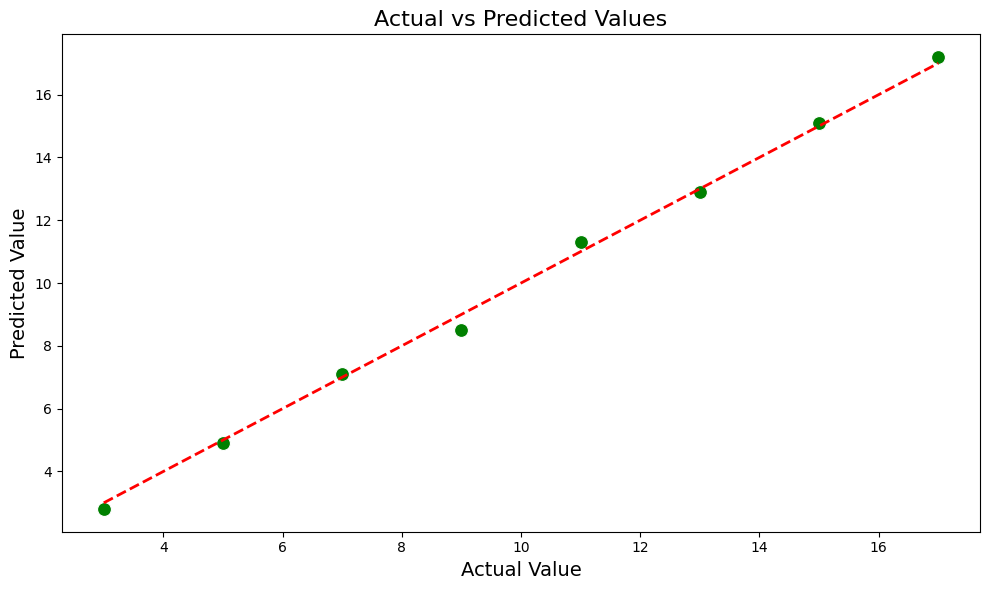

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data (replace with your actual data)
# y_test = [your actual values]
# y_pred = [your predicted values]
y_test = np.array([3, 5, 7, 9, 11, 13, 15, 17])
y_pred = np.array([2.8, 4.9, 7.1, 8.5, 11.3, 12.9, 15.1, 17.2])

# Create a figure with subplots
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, color='green', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')

# Set the title and labels
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

